# Урок №3

In [119]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

    начальные данные:

In [120]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30],  # возраст репетитора
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика

1. Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`).

In [121]:
def calc_logloss(y, p):
    p = np.clip(p, a_max=0.999, a_min=10e-5) # обрезаем значения p с двух сторон
    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
    return err

In [122]:
calc_logloss(1, 1)

0.0010005003335835344

2. На данных из урока изучите влияние гиперпараметров на ошибку алгоритма. Подберите аргументы функции `eval_LR_model` для логистической регрессии таким образом, чтобы log loss не превышал значение `0.5` `(0.3).` Как изменились веса?

In [123]:
def standardization(X):
    S = (X - X.mean(axis=0)) / X.std(axis=0)
    return S

X_st = X.copy()
X_st[:, 1:] = standardization(X[:, 1:])

In [124]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [125]:
def eval_LR_model(X, y, iterations, eta=1e-4):
    w_0, w_1, w_2, w_3, w_4, i_ = [], [], [], [], [], []
    np.random.seed(10)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, pred)
        w -= eta * (1 / n * np.dot((pred - y), X))
        if i % (iterations / 10) == 0:
            w_1.append(w[1])
            w_2.append(w[2])
            w_3.append(w[3])
            w_4.append(w[4])
            i_.append(i)
            print(i, w, err)
    return w, w_1, w_2, w_3, w_4, i_

In [126]:
w, w_1, w_2, w_3, w_4, i_ = eval_LR_model(X_st, y, iterations=1000, eta=1)

100 [ 0.37156899 -0.44079674 -1.45255247 -2.61701292  5.1366755 ] 0.24967492676945433
200 [ 0.62436226 -0.24605143 -2.30810656 -3.41998536  6.76505098] 0.20757586421501983
300 [ 0.81036289  0.01415041 -2.98086131 -4.04541104  7.93886197] 0.18421220636675967
400 [ 0.95706662  0.26254725 -3.52770272 -4.58386226  8.89260793] 0.1683316727213787
500 [ 1.07794489  0.49172327 -3.99310309 -5.06088945  9.7085992 ] 0.1565352682041476
600 [ 1.18069788  0.70331745 -4.40228845 -5.49086776 10.42822447] 0.14729573214976754
700 [ 1.2700786   0.90009227 -4.77034639 -5.88360647 11.07599427] 0.13974010505753467
800 [ 1.34920194  1.08456626 -5.1069501  -6.24620081 11.66783696] 0.13338697626477097
900 [ 1.42021028  1.25880985 -5.41866463 -6.58394187 12.21475735] 0.1279280088187035
1000 [ 1.48463624  1.42448079 -5.71014811 -6.90086703 12.7247026 ] 0.1231555761597561


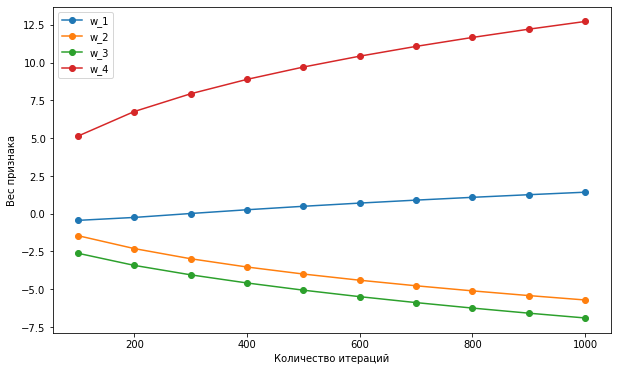

In [127]:
plt.figure(figsize=(10,6))
plt.plot(i_, w_1, 'o-', label='w_1')
plt.plot(i_, w_2, 'o-', label='w_2')
plt.plot(i_, w_3, 'o-', label='w_3')
plt.plot(i_, w_4, 'o-', label='w_4')
plt.xlabel('Количество итераций')
plt.ylabel('Вес признака')
plt.legend()
plt.grid;

Вывод: При уменьшении ошибки увеличиваются значения весов.

3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`.


In [128]:
def calc_pred_proba(X, w):
    return sigmoid(np.dot(X, w)).round(2)

In [129]:
calc_pred_proba(X_st, w)

array([0.28, 0.  , 1.  , 0.18, 0.94, 0.04, 1.  , 0.01, 0.55, 0.99])

4. Создайте функцию `calc_pred`, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, а также порог вероятности.

In [130]:
def calc_pred(X, w, p=0.5):
    return np.where(calc_pred_proba(X, w) < p, 0, 1)

In [131]:
calc_pred(X_st, w, 0.99)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [132]:
calc_pred(X_st, w, 0.99) == y

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True])

5. (\*) Напишите функции для расчета accuracy, матрицы ошибок, precision и recall, а также F1-score.

In [133]:
X = np.array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1]) # произвольные данные с ошибками

In [134]:
print(f' y = {y}\n X = {X}')


 y = [0 0 1 0 1 0 1 0 1 1]
 X = [0 0 1 1 1 0 1 1 0 1]


In [135]:
X == y

array([ True,  True,  True, False,  True,  True,  True, False, False,
        True])

*Accuracy*

In [136]:
def accuracy(X, y):
    true_num = 0
    for i in range(y.shape[0]):
        if X[i] == y[i]:
            true_num += 1
    return true_num / y.shape[0]

*Матрица ошибок*

In [137]:
def mat_errors(X, y):
    mat_err = np.zeros((2, 2))
    for i in range(y.shape[0]):
        if X[i] == 1 and y[i] == 1: #True positive
            mat_err[0, 0] += 1
        elif X[i] == 1 and y[i] == 0: #False positive
            mat_err[0, 1] += 1
        elif X[i] == 0 and y[i] == 1: #False negative
            mat_err[1, 0] += 1
        elif X[i] == 0 and y[i] == 0: #True negative
            mat_err[1, 1] += 1
        else:
            print('Некорректные данные')
    return mat_err

*Precision*

In [138]:
def precision(X, y): 
    TP, FP = 0, 0
    for i in range(y.shape[0]):
        if X[i] == 1 and y[i] == 1: #True positive
            TP += 1
        elif X[i] == 1 and y[i] == 0: #False positive
            FP += 1
    return TP / (TP + FP) #precision = TP / (TP + FP)

*Recall*

In [139]:
def recall(X, y): 
    TP, FN = 0, 0
    for i in range(y.shape[0]):
        if X[i] == 1 and y[i] == 1: #True positive
            TP += 1
        elif X[i] == 0 and y[i] == 1: #False negative
            FN += 1
    return TP / (TP + FN) #recall = TP / (TP + FN)

*F1-score*

In [140]:
def F1_score(X, y, b=1):
    recall_ = recall(X, y)
    precision_ =  precision(X, y)
    return (1 + b ** 2) * (recall_ * precision_) / ((b ** 2) *precision_ + recall_)

*Результат*

In [141]:
accuracy(X, y)

0.7

In [142]:
mat_errors(X, y)

array([[4., 2.],
       [1., 3.]])

In [143]:
precision(X, y)

0.6666666666666666

In [144]:
recall(X, y)

0.8

In [145]:
F1_score(X, y)

0.7272727272727272